In [190]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [191]:
data = load_breast_cancer()

In [192]:
x = data.data
y = data.target

In [193]:
x.shape

(569, 30)

In [194]:
y.shape

(569,)

In [205]:
class LogisticRegression:
    def __init__(self, x, y):
        self.intercept = np.ones((x.shape[0], 1))
        self.x  = np.concatenate((self.intercept, x), axis = 1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1/(1+np.exp(-z))
    def loss(self, h, y):
        return -y*np.log(h)-(1-y)*np.log(1-h)
    def gradient_descent(self, x, h, y):
        return np.dot(x.T,(h-y))/y.shape[0]
    def bias(self, h, y):
        return np.sum(h-y)/y.shape[0]
    def fit(self, lr, iterations):
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
            loss = self.loss(sigma, self.y)
            dw = self.gradient_descent(self.x, sigma, self.y)
            db = self.bias(sigma, self.y)
            self.weight -= lr*dw
        return print('successfully fit')
    def predict(self, x_new , treshold):
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        result = self.sigmoid(x_new, self.weight)
        result = result >= treshold
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] == True: 
                y_pred[i] = 1
            else:
                continue
                 
        return y_pred
        

In [206]:
regressor = LogisticRegression(x,y)
regressor.fit(0.1 , 5000)

/Users/ashimamalik/PycharmProjects/vEnv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/Users/ashimamalik/PycharmProjects/vEnv/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/ashimamalik/PycharmProjects/vEnv/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


successfully fit


In [207]:
y_pred = regressor.predict(x,0.5)

/Users/ashimamalik/PycharmProjects/vEnv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


In [208]:
accuracy = sum(y_pred == y) / y.shape[0]
accuracy

0.9226713532513181

In [211]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve

In [214]:
import pandas as pd
x = pd.DataFrame(x)

In [215]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [221]:
x.shape

(569, 30)

In [224]:
y = pd.DataFrame(y)
y.shape

(569, 1)

In [227]:
x.isnull().values.any()

False

In [229]:
x.isnull().sum().sum()

0

In [235]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
lr = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 0.1, random_state=1)
lr.fit(X_train, y_train)

/Users/ashimamalik/PycharmProjects/vEnv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [236]:
y_pred = lr.predict(X_test)

In [237]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [251]:
confat = confusion_matrix(y_test, y_pred)
confat

array([[ 57,   6],
       [  4, 104]])

Text(0.5, 257.44, 'Predicted label')

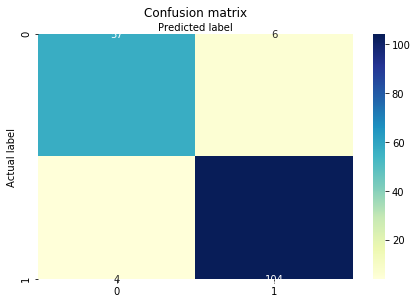

In [255]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [240]:
accuracy_score(y_test, y_pred)

0.9415204678362573

In [241]:
recall_score(y_test, y_pred)

0.9629629629629629

In [256]:
import scikitplot as skplt

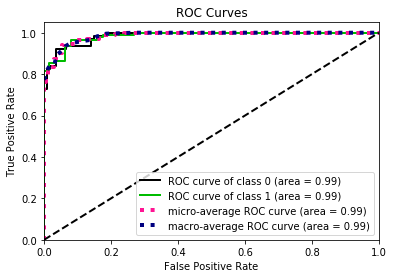

In [258]:
skplt.metrics.plot_roc(y_test, lr.predict_proba(X_test))